In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, Binarizer, KBinsDiscretizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, train_test_split, cross_validate, KFold, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_regression, SelectPercentile
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, SCORERS, mean_absolute_error
from sklearn.dummy import DummyRegressor
from pandas_profiling import ProfileReport
import prepare_num_cat
import git
import os
import scikitplot as skplt
from scipy.stats import uniform, truncnorm, randint, reciprocal, expon
from pprint import pprint
from lightgbm import LGBMRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 0) Big Picture

# 1) Get data

### - Create Environment

### - Download Data (optional)

### - Load Data

In [439]:
filename1 = 'C:/Users/allen/your_file.csv'
df_original = pd.read_csv(filename1, index_col=0)

# 2) Quick Glance

In [440]:
# Data copied for EDA
df_train_EDA = df_original.copy()

In [441]:
df_train_EDA.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### - Statistics

In [442]:
#df_train_EDA.info()

In [1]:
# check categories for one categorical variable
df_train_EDA[''].value_counts()

In [444]:
# check quantiles for one numeric variable
df_train_EDA[''].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [446]:
# histograms to check distributions
df_train_EDA.drop(
    columns=['']).hist(bins=50,
                                                                                                           figsize=(20, 15))
plt.show()

## Findings:
- 
- 

### - Create a Test Set: train-test-split or stratifiedshufflesplit (if each category have at least two rows)

In [448]:
df = df_original.copy()
df_X = df.drop(columns='target')
y = df['target']

In [2]:
# stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
for train_index, test_index in split.split(df_X, df_y):
    df_X_train, df_X_test = df_X[train_index], df_X[test_index]
    df_y_train, df_y_test = df_y[train_index], df_y[tets_index]

print(strat_train_set['type'].value_counts())
print(strat_test_set['type'].value_counts())

NameError: name 'StratifiedShuffleSplit' is not defined

In [450]:
# train test split
df_X_train, df_X_test, y_train, y_test = train_test_split(df_X, y, random_state=5, test_size=0.2)

In [451]:
df_X_train.shape

(1168, 79)

### - Profile Report from Pandas_rolling

In [452]:
ProfileReport(df_original)

# 3) EDA & Insights

In [3]:
# recombine features and target together for EDA
df_train_EDA = pd.concat([df_X_train.copy(), y_train.copy()], axis=1)
#print(df_train_EDA.shape)

NameError: name 'pd' is not defined

## - Scatterplots (if not too many features)

In [454]:
#pd.plotting.scatter_matrix(df_train_EDA.select_dtypes(exclude=['O']), figsize=(12,8))
#plt.show()

### - Correlations

In [455]:
# correlation with y
corr_matrix = df_train_EDA.corr()
#corr_matrix['target'].sort_values(ascending=False)

## Top 5 features highly correlated with target: 
 -  
 -  
 - 
 - 
 - 

In [456]:
# correlation pairs ranked
df_train_EDA.corr().unstack().sort_values(ascending=False).drop_duplicates()

### - Experimenting with Attribute Combos

In [ ]:
class FeatureCreation(BaseEstimator, TransformerMixin):
    def __init__(self, ):
        # create class variables
        self. =
        self. =
        self. =
        self. =
        self. =
        self. =
        self. =
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_cpy = X.copy()
        
        return X_cpy

# 4) Pipelines

### - Separating numeric and categorical features

In [10]:
# need to create new features before separating
df_X_train_proc = FeatureCreation().fit_transform(df_X_train)

NameError: name 'FeatureCreation' is not defined

In [461]:
# features to delete
X_too_many_NA = []
numeric_X_too_many_zero = []
X_to_delete = list(set(X_too_many_NA) | set(numeric_X_too_many_zero))
print(len(X_to_delete))

10


In [8]:
# categorical features that should be numeric
num_to_cat = []

csv_path_num = 'C:/Users/allen/'
csv_path_cat = 'C:/Users/allen/'
# retrieve variable names
numeric_X, categorical_X = prepare_num_cat.prepare_num_cat_for_pipeline(df_X_train_proc, num_to_cat, csv_path_num=csv_path_num, 
                             csv_path_cat=csv_path_cat, save_and_load=True)
print(len(numeric_X))
print(len(categorical_X))

NameError: name 'df_X_train_proc' is not defined

In [463]:
# remove unwanted features
numeric_X, categorical_X = remove_features_from_num_cat(numeric_X, categorical_X, X_to_remove=X_to_delete)
print(len(numeric_X))
print(len(categorical_X))

30
46


In [464]:
df_X_train_proc[numeric_X].head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,TotHalfBath,TotFullBath,TotalBath,FlrArea,GrLivAreaRate,FlrLotRate,BsmtBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1359,NaN,2117,6,5,216.0,378,378,756,769,804,1573,0,0,2,1,3,1,5,0,2,440,0,32,1,2,3,1573,0.743033,0.743033,0
391,50.0,8405,5,8,0.0,241,229,861,961,406,1367,1,0,1,0,4,1,7,0,1,384,0,130,0,2,2,1367,0.162641,0.162641,1
1335,24.0,2368,5,6,312.0,765,0,765,765,600,1365,0,0,1,1,3,1,7,0,2,440,0,36,1,1,2,1365,0.576436,0.576436,0
1073,50.0,7585,5,3,0.0,0,810,810,1002,454,1456,1,1,1,0,4,1,7,1,1,280,0,0,1,2,3,1456,0.191958,0.191958,2
1444,NaN,8854,6,6,0.0,0,952,952,952,0,952,0,0,1,0,2,1,4,1,1,192,0,98,0,1,1,952,0.107522,0.107522,0


In [465]:
df_X_train_proc[categorical_X].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1359,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,WD,Normal,160,2000,2000,2000.0,6,2010
391,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,Gd,No,Rec,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,MnPrv,WD,Normal,50,1900,1950,1978.0,4,2008
1335,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,LwQ,Unf,GasA,TA,Y,SBrkr,TA,Min1,NaN,Attchd,Unf,TA,TA,Y,NaN,WD,Normal,160,1970,1970,1970.0,5,2009
1073,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Fa,Fa,Mn,Unf,Unf,GasA,Fa,Y,FuseA,TA,Typ,TA,Detchd,Unf,TA,TA,P,NaN,WD,Normal,50,1948,1950,1954.0,8,2006
1444,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,Grav,Fa,N,FuseF,Fa,Typ,Gd,Detchd,Unf,Fa,Po,P,NaN,WD,Normal,30,1916,1950,1916.0,5,2009


## a. pipe_1: Basic Processing  

In [466]:
numeric_pipe = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('standardize', StandardScaler()),
    ('selectPerc', SelectPercentile(score_func=f_regression, percentile=100)),
    ])

categorical_pipe = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('OHE', OneHotEncoder(categories='auto',sparse=False, handle_unknown='ignore', dtype=int)),
    ('selectPerc', SelectPercentile(score_func=chi2, percentile=100)),
    ])


pipe_1 = make_pipeline(FeatureCreation(),
                       ColumnTransformer([ 
    ("numeric_pipe", numeric_pipe, numeric_X),
    ("categorical_pipe", categorical_pipe, categorical_X)
    ], n_jobs=-1)
                      )

In [467]:
pipe_1.fit_transform(df_X_train, y_train).shape

(1168, 459)

# 5) Model Selection & Training

### - Shortlist 2 - 5 algoritms using cross validation

In [390]:
def reg_models_list(pipe):
    pipelines = []
    pipelines.append(('NULL', Pipeline([('base_pipe', pipe),('NULL', DummyRegressor(strategy='mean'))])))
    pipelines.append(('LR', Pipeline([('base_pipe', pipe),('LR', LinearRegression())])))
    pipelines.append(('LASSO', Pipeline([('base_pipe', pipe),('LASSO', Lasso())])))
    pipelines.append(('RIDGE', Pipeline([('base_pipe', pipe),('RIDGE', Ridge())])))
    pipelines.append(('EN', Pipeline([('base_pipe', pipe),('EN', ElasticNet())])))
    pipelines.append(('KNN', Pipeline([('base_pipe', pipe),('KNN', KNeighborsRegressor())])))
    pipelines.append(('CART', Pipeline([('base_pipe', pipe),('CART', DecisionTreeRegressor())])))
    pipelines.append(('RF', Pipeline([('base_pipe', pipe),('RF', RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=5))])))
    pipelines.append(('ET', Pipeline([('base_pipe', pipe),('ET', ExtraTreesRegressor(n_estimators=100, n_jobs=-1, random_state=5))])))
    pipelines.append(('ADAtree', Pipeline([('base_pipe', pipe),('ADAtree', AdaBoostRegressor(n_estimators=50, random_state=5))])))
    pipelines.append(('GBRT', Pipeline([('base_pipe', pipe),('GBRT', GradientBoostingRegressor(n_estimators=100, random_state=5))])))
    pipelines.append(('LGBM', Pipeline([('base_pipe', pipe),('LGBM', LGBMRegressor(n_estimators=100, n_jobs=-1))])))
    pipelines.append(('LinearSVR', Pipeline([('base_pipe', pipe),('LinearSVR', SVR(gamma='auto', kernel='linear', cache_size=1000))])))
    pipelines.append(('PolySVR', Pipeline([('base_pipe', pipe),('PolySVR', SVR(gamma='auto', kernel='poly',cache_size=1000))])))
    pipelines.append(('RbfSVR', Pipeline([('base_pipe', pipe),('RbfSVR', SVR(gamma='auto', kernel='rbf',cache_size=1000))])))
    return pipelines

In [274]:
train_scores = []
test_scores = []
names = []
num_folds = 10
seed = 5
scoring = 'neg_mean_absolute_error'
pipelines = reg_models_list(pipe_1)
for name, model in pipelines:
    # define how to split off validation data
    kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    # train the model
    cv_results= cross_validate(model, df_X_train, y_train, cv=kfold, scoring=scoring, return_train_score=True, n_jobs=-1)
    train_scores.append(cv_results['train_score'])
    test_scores.append(cv_results['test_score'])
    names.append(name)
    mean_validation_score = cv_results['test_score'].mean()
    std_validation_score = cv_results['test_score'].std()
    mean_train_score = cv_results['train_score'].mean()
    std_train_score = cv_results['train_score'].std()
    #msg= "%s: %f (%f)" % (name, cv_results['test_score'].mean(), cv_results['test_score'].std())
    print(f'{name}: validation score = {mean_validation_score:.3f} ({std_validation_score:.3f})')
    print(f'{name}: train score = {mean_train_score:.3f} ({std_train_score:.3f})\n')

NULL: validation score = -57814.763 (3561.450)
NULL: train score = -57773.100 (486.333)

LASSO: validation score = -23640.057 (3035.796)
LASSO: train score = -11070.061 (228.475)

RIDGE: validation score = -20907.674 (1808.920)
RIDGE: train score = -12981.979 (426.625)

EN: validation score = -19801.230 (2414.330)
EN: train score = -18815.993 (355.177)

KNN: validation score = -20636.113 (2259.550)
KNN: train score = -16732.775 (267.350)

CART: validation score = -27209.452 (3630.752)
CART: train score = 0.000 (0.000)

RF: validation score = -18678.204 (2097.775)
RF: train score = -6933.381 (102.744)

ET: validation score = -18315.706 (1719.852)
ET: train score = 0.000 (0.000)

LASSObag: validation score = -24593.959 (3338.558)
LASSObag: train score = -15174.506 (504.763)

ENbag: validation score = -19811.215 (2541.164)
ENbag: train score = -18882.382 (302.348)

ADAtree: validation score = -24760.366 (1767.360)
ADAtree: train score = -21466.228 (801.511)

GBRT: validation score = -1737

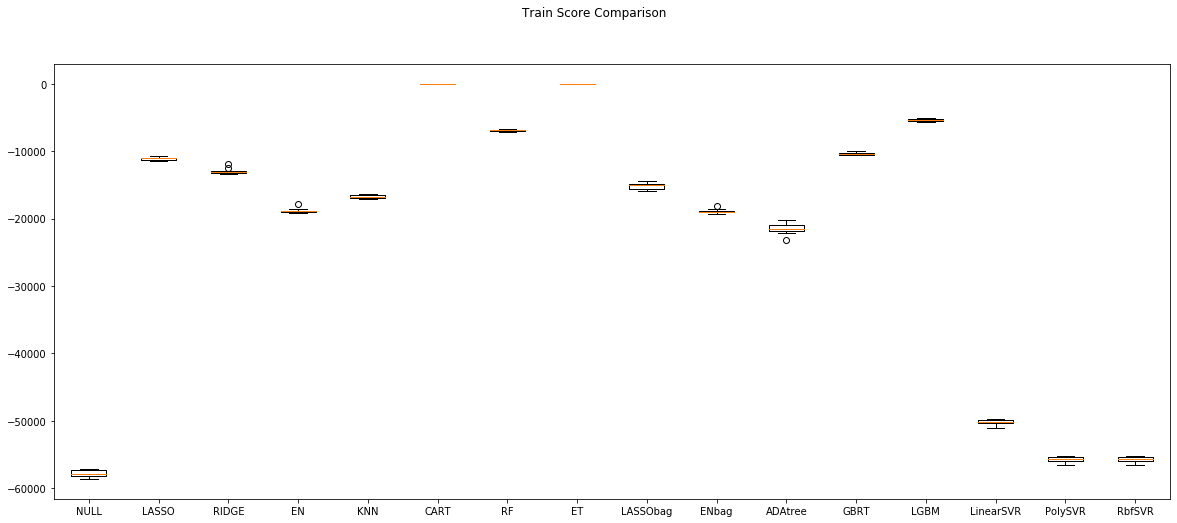

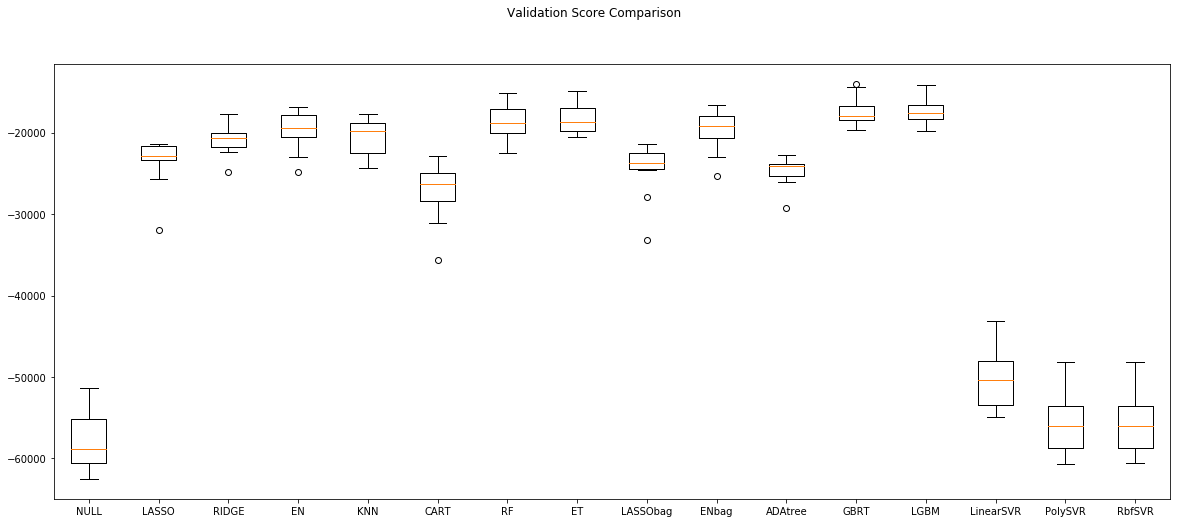

In [393]:
%matplotlib inline
# visualize the training and validation scores for each algorithm
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Train Score Comparison')
ax = fig.add_subplot(111)
plt.boxplot(train_scores)
ax.set_xticklabels(names)
plt.show()

fig = plt.figure(figsize=(20, 8))
fig.suptitle('Validation Score Comparison')
ax = fig.add_subplot(111)
plt.boxplot(test_scores)
ax.set_xticklabels(names)
#plt.ylim([-1e+29, 0.1e+29])
plt.show()

### High Bias:
### Low Bias:
### Best Score:

## Model selected:
- 
- 
- 
- 
- 

## Final Model 1 (Single Best):

In [ ]:
pipe_2 = Pipeline([
    ('pipe_1', pipe_1),
    ('', )
])

## Final Model 2: VotingRegressor

In [469]:
voter = VotingRegressor(estimators=[(),
                                    (),
                                    (),
                                    (),
                                    ()
                                   ])

pipe_3 = Pipeline([
    ('pipe_1', pipe_1),
    ('voter', voter)
])

## Final Model 3: Blender

In [471]:
blender = StackingRegressor(estimators=[(),
                                        (),
                                        (),
                                        (),
                                        ()
                                       ])

pipe_4 =  Pipeline([
    ('pipe_1', pipe_1),
    ('blender', blender)
])

# 6) Hyperparameter Tuning

### - Grid Search

### - Randomized Search

In [11]:
# get param names
#pipe_2.get_params().keys()

In [431]:
# randomized search
param_distribution = {
    '': ,
    '': ,
    '': ,
    '': ,
    '': ,
    '': ,
    '': ,
    '': ,
    '': ,
    '': ,
    '': ,
    '': ,
    '': , 
    '': ,
    '': ,
    '': 
    
}
rand_search = RandomizedSearchCV(pipe_2, param_distribution, n_iter=50, cv=10, verbose=5, error_score='raise',
                                 n_jobs=-1, return_train_score=True, scoring='neg_mean_absolute_error', random_state=5)
rand_search.fit(df_X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 23.0min finished


RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=Pipeline(memory=None,
                                      steps=[('pipe_1',
                                              Pipeline(memory=None,
                                                       steps=[('featurecreation',
                                                               FeatureCreation(BsmtBath=True,
                                                                               FlrArea=True,
                                                                               FlrLotRate=True,
                                                                               GrLivAreaRate=True,
                                                                               TotFullBath=True,
                                                                               TotHalfBath=True,
                                                                               TotalBath=True)),
                       

In [432]:
pprint(rand_search.best_params_)
print('\n')
print(f'best cv score: {rand_search.best_score_}')
print(f"average validation score: {rand_search.cv_results_['mean_test_score'].mean()}")
print(f"average train score: {rand_search.cv_results_['mean_train_score'].mean()}")

{'blender__ADATree__learning_rate': 1.8496918296787195,
 'blender__ADATree__n_estimators': 39,
 'blender__EN__alpha': 0.0697492141638207,
 'blender__EN__l1_ratio': 0.8992358657609579,
 'blender__ET__max_features': 0.8875346777970039,
 'blender__ET__min_samples_split': 0.7738651326490237,
 'blender__ET__n_estimators': 71,
 'blender__KNN__algorithm': 'brute',
 'blender__KNN__n_neighbors': 18,
 'blender__KNN__weights': 'distance',
 'blender__LGBM__learning_rate': 0.23647644330704082,
 'blender__LGBM__min_child_samples': 59,
 'blender__LGBM__n_estimators': 51,
 'blender__LGBM__num_leaves': 57,
 'pipe_1__columntransformer__categorical_pipe__selectPerc__percentile': 100,
 'pipe_1__columntransformer__numeric_pipe__selectPerc__percentile': 65}


best cv score: -17197.27613658386
average validation score: -17939.80991575506
average train score: -10834.233445050804


# **Final Model 1 best params:**


# **Final Model 2 best params:**



# **Final Model 3 best params:**



### - Evaluate on Test set

In [473]:
y_pred = pipe_3.fit(df_X_train, y_train).predict(df_X_test)
mean_absolute_error(y_test, y_pred)

16221.610692906557

### - Check learning curve for signs of overfitting
If high bias, might change model, do feature transformations, or increase model complexity

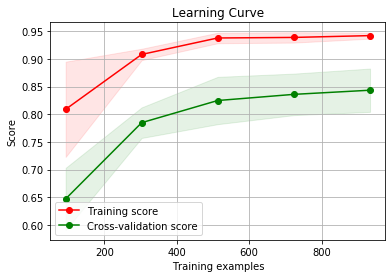

In [437]:
skplt.estimators.plot_learning_curve(pipe_3, df_X_train, y_train)
plt.show()

### Save Best Final Model:

In [482]:
# save model as a joblib file
filename = 'C:/Users/allen/advanced-house-price-prediction/.joblib'
joblib.dump(pipe_3, filename)

['C:/Users/allen/advanced-house-price-prediction/model/house_price_final_model.joblib']

## Predict Unknown data for Kaggle Submission

In [486]:
sale_price_pred = pipe_3.predict(df_unknown_original)
pd.DataFrame({'Id':df_unknown_original.index, 'SalePrice':sale_price_pred}).to_csv('C:/Users/allen/advanced-house-price-prediction/.csv', index=False)

# 7) Present Solution

### - Assumptions:

# 8) Launch model

### - Deploy Model